In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
mashroom=pd.read_csv("mushrooms.csv")
mashroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
mashroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mashroom=mashroom[mashroom['stalk-root'] != '?']

In [6]:
x=mashroom.iloc[:,1:]
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [7]:
y=mashroom.iloc[:,0:1]
y.head()

,class
0,p
1,e
2,e
3,p
4,e


In [8]:
y['class'].value_counts()

e    3488
p    2156
Name: class, dtype: int64

In [9]:
x_d=pd.get_dummies(x)
x_d.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
scaler=StandardScaler()
x_sd = scaler.fit_transform(x_d)

In [11]:
le=LabelEncoder()
y_sd =le.fit_transform(y.values.ravel())

In [12]:
x_sd

array([[-0.23693401, -0.02663118, -0.87014978, ..., -0.23357877,
        -0.33451328,  3.78641737],
       [-0.23693401, -0.02663118, -0.87014978, ..., -0.23357877,
        -0.33451328, -0.26410189],
       [ 4.22058448, -0.02663118, -0.87014978, ...,  4.28121094,
        -0.33451328, -0.26410189],
       ...,
       [-0.23693401, -0.02663118, -0.87014978, ..., -0.23357877,
         2.98941796, -0.26410189],
       [-0.23693401, -0.02663118, -0.87014978, ..., -0.23357877,
        -0.33451328, -0.26410189],
       [-0.23693401, -0.02663118,  1.14922743, ..., -0.23357877,
        -0.33451328, -0.26410189]])

In [13]:
y_sd

array([1, 0, 0, ..., 0, 1, 1])

In [14]:
IM=LogisticRegression()

In [16]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_sd,y_sd,test_size=.22, random_state=i)
    IM.fit(x_train,y_train)
    pred_train=IM.predict(x_train)
    pred_test=IM.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("at ramdom state",i,"the model performs very well")
        print("at ramdom state",i)
        print("Training r2_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is:-",accuracy_score(y_test,pred_test)*100)

at ramdom state 0 the model performs very well
at ramdom state 0
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 1 the model performs very well
at ramdom state 1
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 2 the model performs very well
at ramdom state 2
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 3 the model performs very well
at ramdom state 3
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 4 the model performs very well
at ramdom state 4
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 5 the model performs very well
at ramdom state 5
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 7 the model performs very well
at ramdom state 7
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 8 the model performs very well
at ramdom state 8
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 9 the mo

at ramdom state 69 the model performs very well
at ramdom state 69
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 70 the model performs very well
at ramdom state 70
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 71 the model performs very well
at ramdom state 71
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 72 the model performs very well
at ramdom state 72
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 73 the model performs very well
at ramdom state 73
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 74 the model performs very well
at ramdom state 74
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 75 the model performs very well
at ramdom state 75
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 76 the model performs very well
at ramdom state 76
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdo

at ramdom state 136 the model performs very well
at ramdom state 136
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 137 the model performs very well
at ramdom state 137
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 138 the model performs very well
at ramdom state 138
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 139 the model performs very well
at ramdom state 139
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 140 the model performs very well
at ramdom state 140
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 141 the model performs very well
at ramdom state 141
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 142 the model performs very well
at ramdom state 142
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 143 the model performs very well
at ramdom state 143
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 202 the model performs very well
at ramdom state 202
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 203 the model performs very well
at ramdom state 203
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 204 the model performs very well
at ramdom state 204
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 205 the model performs very well
at ramdom state 205
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 206 the model performs very well
at ramdom state 206
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 208 the model performs very well
at ramdom state 208
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 209 the model performs very well
at ramdom state 209
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 210 the model performs very well
at ramdom state 210
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 272 the model performs very well
at ramdom state 272
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 273 the model performs very well
at ramdom state 273
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 274 the model performs very well
at ramdom state 274
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 275 the model performs very well
at ramdom state 275
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 276 the model performs very well
at ramdom state 276
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 277 the model performs very well
at ramdom state 277
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 278 the model performs very well
at ramdom state 278
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 279 the model performs very well
at ramdom state 279
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 339 the model performs very well
at ramdom state 339
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 340 the model performs very well
at ramdom state 340
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 341 the model performs very well
at ramdom state 341
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 342 the model performs very well
at ramdom state 342
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 343 the model performs very well
at ramdom state 343
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 344 the model performs very well
at ramdom state 344
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 345 the model performs very well
at ramdom state 345
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 346 the model performs very well
at ramdom state 346
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 408 the model performs very well
at ramdom state 408
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 409 the model performs very well
at ramdom state 409
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 410 the model performs very well
at ramdom state 410
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 411 the model performs very well
at ramdom state 411
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 412 the model performs very well
at ramdom state 412
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 413 the model performs very well
at ramdom state 413
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 414 the model performs very well
at ramdom state 414
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 415 the model performs very well
at ramdom state 415
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 476 the model performs very well
at ramdom state 476
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 477 the model performs very well
at ramdom state 477
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 478 the model performs very well
at ramdom state 478
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 479 the model performs very well
at ramdom state 479
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 480 the model performs very well
at ramdom state 480
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 481 the model performs very well
at ramdom state 481
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 482 the model performs very well
at ramdom state 482
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 483 the model performs very well
at ramdom state 483
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 542 the model performs very well
at ramdom state 542
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 543 the model performs very well
at ramdom state 543
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 544 the model performs very well
at ramdom state 544
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 545 the model performs very well
at ramdom state 545
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 546 the model performs very well
at ramdom state 546
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 547 the model performs very well
at ramdom state 547
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 548 the model performs very well
at ramdom state 548
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 549 the model performs very well
at ramdom state 549
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 610 the model performs very well
at ramdom state 610
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 611 the model performs very well
at ramdom state 611
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 612 the model performs very well
at ramdom state 612
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 613 the model performs very well
at ramdom state 613
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 614 the model performs very well
at ramdom state 614
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 615 the model performs very well
at ramdom state 615
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 616 the model performs very well
at ramdom state 616
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 617 the model performs very well
at ramdom state 617
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 677 the model performs very well
at ramdom state 677
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 678 the model performs very well
at ramdom state 678
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 679 the model performs very well
at ramdom state 679
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 680 the model performs very well
at ramdom state 680
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 681 the model performs very well
at ramdom state 681
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 682 the model performs very well
at ramdom state 682
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 683 the model performs very well
at ramdom state 683
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 684 the model performs very well
at ramdom state 684
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 746 the model performs very well
at ramdom state 746
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 747 the model performs very well
at ramdom state 747
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 748 the model performs very well
at ramdom state 748
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 749 the model performs very well
at ramdom state 749
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 750 the model performs very well
at ramdom state 750
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 751 the model performs very well
at ramdom state 751
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 752 the model performs very well
at ramdom state 752
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 753 the model performs very well
at ramdom state 753
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 813 the model performs very well
at ramdom state 813
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 814 the model performs very well
at ramdom state 814
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 815 the model performs very well
at ramdom state 815
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 816 the model performs very well
at ramdom state 816
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 817 the model performs very well
at ramdom state 817
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 818 the model performs very well
at ramdom state 818
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 819 the model performs very well
at ramdom state 819
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 821 the model performs very well
at ramdom state 821
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 882 the model performs very well
at ramdom state 882
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 883 the model performs very well
at ramdom state 883
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 884 the model performs very well
at ramdom state 884
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 885 the model performs very well
at ramdom state 885
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 886 the model performs very well
at ramdom state 886
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 887 the model performs very well
at ramdom state 887
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 888 the model performs very well
at ramdom state 888
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 889 the model performs very well
at ramdom state 889
Training r2_score is:- 100.0
Testing r2_score is:

at ramdom state 948 the model performs very well
at ramdom state 948
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 949 the model performs very well
at ramdom state 949
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 950 the model performs very well
at ramdom state 950
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 951 the model performs very well
at ramdom state 951
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 952 the model performs very well
at ramdom state 952
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 953 the model performs very well
at ramdom state 953
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 954 the model performs very well
at ramdom state 954
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
at ramdom state 955 the model performs very well
at ramdom state 955
Training r2_score is:- 100.0
Testing r2_score is:

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_sd,y_sd,test_size=.22,stratify=y_sd, random_state=777)

In [18]:
IM=LogisticRegression()
IM.fit(x_train,y_train)
pred=IM.predict(x_test)
print("accuracy score:",accuracy_score(y_test,pred))
print("confusion-matrix", confusion_matrix(y_test,pred))
print("classification-report",classification_report(y_test,pred))

accuracy score: 1.0
confusion-matrix [[768   0]
 [  0 474]]
classification-report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       768
           1       1.00      1.00      1.00       474

    accuracy                           1.00      1242
   macro avg       1.00      1.00      1.00      1242
weighted avg       1.00      1.00      1.00      1242



In [25]:
pred_lr=IM.predict(x_test)
from sklearn.model_selection import cross_val_score
iss=accuracy_score(y_test,pred_lr)
for j in range(2,30):
    isscore=cross_val_score(IM,x_sd,y_sd,cv=j)
    isc=isscore.mean()
    print("at cv:-",j)
    print("cross validation score is:-",isc*100)
    print("accuracy score is:-",iss*100)
    print("\n")

at cv:- 2
cross validation score is:- 95.46420978029767
accuracy score is:- 100.0


at cv:- 3
cross validation score is:- 93.90624932321894
accuracy score is:- 100.0


at cv:- 4
cross validation score is:- 93.72785258681786
accuracy score is:- 100.0


at cv:- 5
cross validation score is:- 93.69196364070382
accuracy score is:- 100.0


at cv:- 6
cross validation score is:- 93.6750363654178
accuracy score is:- 100.0


at cv:- 7
cross validation score is:- 93.66035491470195
accuracy score is:- 100.0


at cv:- 8
cross validation score is:- 93.6943724509272
accuracy score is:- 100.0


at cv:- 9
cross validation score is:- 98.22789296473508
accuracy score is:- 100.0


at cv:- 10
cross validation score is:- 98.22695035460993
accuracy score is:- 100.0


at cv:- 11
cross validation score is:- 98.22789296473506
accuracy score is:- 100.0


at cv:- 12
cross validation score is:- 98.22695035460993
accuracy score is:- 100.0


at cv:- 13
cross validation score is:- 98.22757887274017
accuracy score is:

In [26]:
isscore_selected=cross_val_score(IM,x_sd,y_sd,cv=25).mean()
print("The CV score is:",isscore_selected,"\nThe accuracy score is:",iss)

The CV score is: 0.9822222222222223 
The accuracy score is: 1.0


# AUC ROC CURVE FOR LOGISTICS REGRESSION

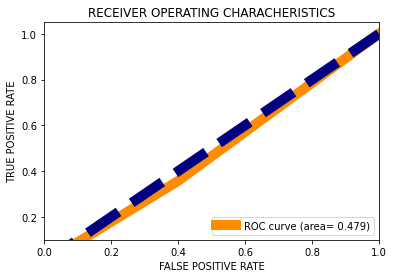

In [32]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=10,label="ROC curve (area=% 0.3f)" % roc_auc)
plt.plot([0,1],[0,1], color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.1,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("RECEIVER OPERATING CHARACHERISTICS")
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_test))

[[448 320]
 [297 177]]


# MODEL SAVING:

In [36]:
import pickle
filename="Mashroom data project-updated.pkl"
pickle.dump(IM,open(filename,'wb'))

# CONCLUSION

In [35]:
import numpy as np
a=np.array(y_test)
Predicted=np.array(IM.predict(x_test))
df_com=pd.DataFrame({"Original":a,"Predicted":Predicted},index=range(len(a)))
df_com

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1237,0,0
1238,0,0
1239,1,1
1240,0,0
